# Lab | Imbalanced data
We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

### Instructions
1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
warnings.filterwarnings('ignore')

## 1. Load the dataset and explore the variables.


In [2]:
df = pd.read_csv('customer_churn.csv',sep=",")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# standardize column name
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))] 

In [5]:
df.shape

(7043, 21)

In [6]:
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [7]:
# get numerical
numerical = df[["tenure", "monthlycharges"]]

# get categorical
categorical = df[["seniorcitizen"]]

In [8]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   monthlycharges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


In [9]:
numerical.describe()

,tenure,monthlycharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


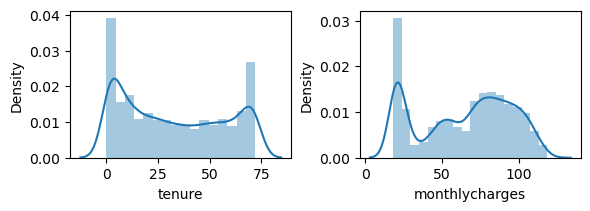

In [10]:
# visualize to understand the data >> see data distribution

import matplotlib.pyplot as plt
import seaborn as sns 

enum = list(enumerate(numerical, start = 1)) 
plt.figure(figsize = (8, 2), constrained_layout = True)

for i in enum:
    plt.subplot(1, 3, i[0]) # create multi-plot, using subplot, 1 rows, 3 cols, sequence of plot (iterate through enum_x)
    sns.distplot(numerical[(i[1])])
    


In [11]:
# Normalizes numerical data

transformer = StandardScaler().fit(numerical)
standard_x = transformer.transform(numerical)
X_normed = pd.DataFrame(standard_x)
X_normed.head()

,0,1
0,-1.277445,-1.160323
1,0.066327,-0.259629
2,-1.236724,-0.362660
3,0.514251,-0.746535
4,-1.236724,0.197365


## 3. Extract the target variable.


In [12]:
# the target is Churn, so check the size of values & see how different they are

y = df[['churn']]
y.value_counts()

churn
No       5174
Yes      1869
dtype: int64

## 4. Extract the independent variables and scale them.




In [13]:
# get independent variables, which I already scaled them
X = pd.concat([categorical, X_normed], axis=1)

In [14]:
X.head()

,seniorcitizen,0,1
0,0,-1.277445,-1.160323
1,0,0.066327,-0.259629
2,0,-1.236724,-0.362660
3,0,0.514251,-0.746535
4,0,-1.236724,0.197365


## 5. Build the logistic regression model.


In [15]:
# Split rows
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fitting the model with train sets
classification = LogisticRegression(random_state=0).fit(X_train, y_train)

# predict y with X test set
predictions = classification.predict(X_test)



## 6. Evaluate the model.


In [16]:
# check accuracy score

round(classification.score(X_test, y_test), 2)

0.81

## 7. Even a simple model will give us more than 70% accuracy. Why?


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

          No       0.83      0.92      0.88      1036
         Yes       0.69      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



Because the **accuracy score** only tell us on: 
- Out of all predictions, how many of the them are true? (which including True Posotive & True Negative)
- Here we have 81% accuracy, this could also mean:
    - the model predicts very good on Yes & No groups (equally)
    - the model predicts very good on Yes group (>> very very high score on Yes group). But on the other hand, it's bad prediction on No group (with low score on No group) and vise versa.
    - Somehow when the accuracy score is calculated, the score from both groups are combined. Therefore, it could make up with very high score of accuracy. But it cannot tell yet the model is a good prediction for both groups especially, with the imbalanced data
  
  
Accept for Accuracy score, we take a look at Precision, Recall, F1-score. Which they will tell us more about how good the model is.

#### Precision
This Precision tells us: Out of all the positive predictions, how many are true?
In our case:
- The model predict true 'NO' 83% (out of true 'NO' + false 'NO')
- The model predict true 'YES' 69% (out of true 'YES' + false 'YES')



#### Recall
Recall (Sensitivity) tells us: Out of all the predictions that should be true, how many did the model predicted as true?
In our case:
- Out of all the prediction that supposed to be 'NO', the model correctly predicted 92% of 'NO'
- Out of all the prediction that supposed to be 'YES', the model correctly predicted 48% 'YES'

From here we started to see the differenced of the efficiency of this model through Recall between Yes & No groups. 

There are a huge gaps between them, meaning while the model predicted NO very well, on the other hand it doesn't do well with the YES group.




#### F1-score
F1-score is a measure combines recall & precision (F1 = 2*((Precision*Recall) / (Precision+Recall)).
It tells how effeiciency the model predict for both groups.


- From our predictions, after considering all the metrics, the model predicted well on the 'NO' but not well on the 'YES' group. Even we have high Accuracy score.
- This possibly caused by imbalance data in our target 'churn'


        """
        churn
        No       5174
        Yes      1869
        dtype: int64
        """



## What can we do more?

- As we discussed about all the metrics above, they indicates that the model did not learn well from minority class hence it's not be able to detect/predict well. 

##### Why does this importance?

This will become a serious problem when we want to predict the dataset that the minority class is more significant e.g. 
    
    - cancer prediction dataset: 
        - in this case, we usually have samples of cancer cases way less than the samples of  healthy cases. 
        - The prediction model tends to not be sensitive enough to detect the cancer incidence.

    - fraud detection dataset
    - etc.
        
##### Solutions?        
     

For Data Science, oversampling the minority class **(SMOTE)** and/or undersampling the majority class **(Tomek Links)** are common approaches to solve this imbalanced data problem

## 8. Synthetic Minority Oversampling Technique (SMOTE) 

- SMOTE is an over sampling technique based on nearest neighbors that adds new points between existing points. 

#### Apply imblearn.over_sampling.SMOTE to the dataset. 


In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

churn
No       5174
Yes      5174
dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

classification = LogisticRegression(random_state=0).fit(X_train, y_train)

predictions = classification.predict(X_test)

# print(classification_report(y_test, predictions))

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.74      0.75      0.74      1021
         Yes       0.75      0.74      0.75      1049

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070



#### What I observed after applyint upsampling using SMOTE

- Accuracy score is lower than before applying the SMOTE
- Considering other metrics, we can see that the model predicted better for both classes with similar score for Precision, Recall, F1-scre


### Let's try undersampling with Tomek Links

## 9. Tomek links 

#### Build and evaluate the logistic regression model. Is it there any improvement?


In [21]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

churn
No       4695
Yes      1869
dtype: int64

With Tomek Links method, we downsize the majority class 
        
    """
       churn  From(n) --> To(n)
        No       5174 --> 4695 
        Yes      1869 --> 1869
        dtype: int64
    """

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

classification = LogisticRegression(random_state=0).fit(X_train, y_train)

predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7806549885757806

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.88      0.85       929
         Yes       0.65      0.53      0.59       384

    accuracy                           0.78      1313
   macro avg       0.74      0.71      0.72      1313
weighted avg       0.77      0.78      0.77      1313



### What I observed after applying undersampling using Tomek Links

- Accuracy score is lower than using original data (but similar to the score when we applying SMOTE)
- Considering other metrics: Precision, Recall, F1-score 

        - The model predicted a little better for the minority class (but not extremely significant comparing to the original data) because the sample size of majority class are still a lot higher than the minority class
    
            """
            churn (original data)   (Tomek Links)
            No       5174            4695
            Yes      1869            1869
            dtype: int64
            """



### Conclusion
#### What would I do in the real case? Should I apply SMOTE or Temek Links?

##### SMOTE 
- SMOTE gave us the equal (50/50) information which is ideally for training the model to learn equally from both classes. 
- But this could also mean that the model is (possibly) overfitting for the minority class because SMOTE replicates the minority class events. 
- Especially, when there's a huge gap between 2 classes and SMOTE replicates information to make up number of events to the majority class. 
- Therefore, I prefer to avoid SMOTE when:
        - There's too huge gap of data between 2 classes because it'll create too much replicated data

##### Tomek Links
- Tomek Links removes the event of the majority class when it finds pair to the nearest events of the opposite class. 
- This method makes sense when the data is huge. Somehow it might end up losing some useful information.

      

##### My approch of what to use:
- First, look at the data, check
    - how big is the different between classes?
    - how big is the dataset?
    - consider advantages & disavantages of the methods on each use case
    - how serious/significant is it if you manipulate the dataset?
    - maybe, we can combine oversampling & undersampling when the data is huge & also big gap between classes ??
    


#### Conclusion for this Churn dataset
- SMOTE seems to perform well for both classes considering the metrics that we have got.
- But it replicates and fill up 3305 rows (47% of the whole dataset). It's almost 2 times that SMOTE made up data of the minority class. This is too much (in my opinion) replicated data that SMOTE made up. 



- While Tomek Links removes 479 rows (6.8% of the whole dataset). Even though the metrics indicated that the model doesn't perform very well. But I like to idea of not over manipulating the data. 

- Therefore, I prefer Tomek Links over SMOTE for this dataset.


- After all, I have never worked in the Data Science's world. I as an outsider, surely, have a different view on how to choose/apply oversampling/undersampling method. 
- And I'm hopeing to learn more in the real cases very soon.

## References

- [10 Techniques to Solve Imbalanced Classes in Machine Learning (Updated 2023)](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
- [How to Combine Oversampling and Undersampling for Imbalanced Classification](https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/)
- [What is Accuracy, Precision, Recall and F1 Score?](https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score)
- [A Look at Precision, Recall, and F1-Score](https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec)